# Домашнє завдання: Візуалізація даних з Pandas

## Опис завдання
У цьому домашньому завданні ви працюватимете з датасетом про оренду велосипедів `yulu_rental.csv`. Датасет містить інформацію про кількість орендованих велосипедів залежно від погодних умов, сезону та інших факторів.
Набір даних взяти з Kaggle. Посилання на оригінальний [опис](https://www.kaggle.com/datasets/ranitsarkar01/yulu-bike-sharing-data?select=yulu_bike_sharing_dataset.csv).

**Опис колонок:**
- `datetime` - дата та час
- `season` - квартал (1-Q1, 2-Q2, 3-Q3, 4-Q4)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів



---
🌱 Коментар щодо сезонності

Колонка season у датасеті представляє саме квартали року, а не метеорологічні сезони. Тому всі аналізи сезонності ви можете будувати на основі кварталів.

Водночас дані були зібрані в Індії, де поділ на сезони інший, ніж у Європі чи США. Якщо ви хочете дослідити сезонність відповідно до індійської системи сезонів, можна створити окрему колонку.


Справжні сезони в Індії:

| Сезон        | Місяці                     |
| ------------ | -------------------------- |
| Winter       | December–February (12,1,2) |
| Summer       | March–May (3,4,5)          |
| Monsoon      | June–September (6,7,8,9)   |
| Post-monsoon | October–November (10,11)   |


Тоді потрібно зробити нову колонку weather_season_india, мапнувши місяці так:

12, 1, 2 → 1 (Winter)

3, 4, 5 → 2 (Summer)

6–9 → 3 (Monsoon)

10–11 → 4 (Post-Monsoon)

## Підготовка даних


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
df = pd.read_csv('../data/yulu_rental.csv')

In [3]:
# Перетворення datetime у правильний формат
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

## Завдання 0: Перегляд даних
**Завдання:**
Перегляньте дані, їх розмір, та напишіть висновок:
- скільки даних в наборі
- який рівень деталізації мають ці дані, тобто за який період міститься дані в одному рядку даних ?

In [17]:
print(df.shape)
total_bytes = df.memory_usage().sum()
total_megabytes = total_bytes / (1024 * 1024)
total_megabytes
print(total_megabytes)

(10886, 19)
1.422292709350586


In [4]:
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01,1,52,5,Saturday,2011,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01,1,52,5,Saturday,2011,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01,1,52,5,Saturday,2011,1,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01,1,52,5,Saturday,2011,1,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01,1,52,5,Saturday,2011,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012-12-19,19,51,2,Wednesday,2012,12,19
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012-12-19,19,51,2,Wednesday,2012,12,20
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012-12-19,19,51,2,Wednesday,2012,12,21


*Дані містять 10886 рядків та 19 колонок. Вага файлу 1.4 MB. Один рядок даних містить погодинну інфорцію про оренду велосипедів та погодні умови. Загалом датасет охоплює неповні два роки спостережень*

## Завдання 1: Базовий лінійний графік

**Завдання:**
1. Згрупуйте дані про кількість орендованих велосипедів (`count`) поденно.
2. Побудуйте з методом `DataFrame.plot()` лінійний графік поденної кількості орендованих велосипедів (`count`) за весь період в даних.
3. Налаштуйте розмір графіка (12x6), додайте заголовок "Динаміка оренди велосипедів" та сітку.
4. Дайте відповіді на питання по цьому графіку. Якщо треба - проведіть додаткові програмні операції для відповідей.

**Питання для інтерпретації:**
1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?
2. Які загальні тенденції ви бачите на графіку?
3. Чи помітні якісь сезонні коливання?
4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?


In [28]:
daily_rent = df['count'].resample('D').sum()
daily_rent

datetime
2011-01-01     985
2011-01-02     801
2011-01-03    1349
2011-01-04    1562
2011-01-05    1600
              ... 
2012-12-15    5047
2012-12-16    3786
2012-12-17    4585
2012-12-18    5557
2012-12-19    5267
Freq: D, Name: count, Length: 719, dtype: int64

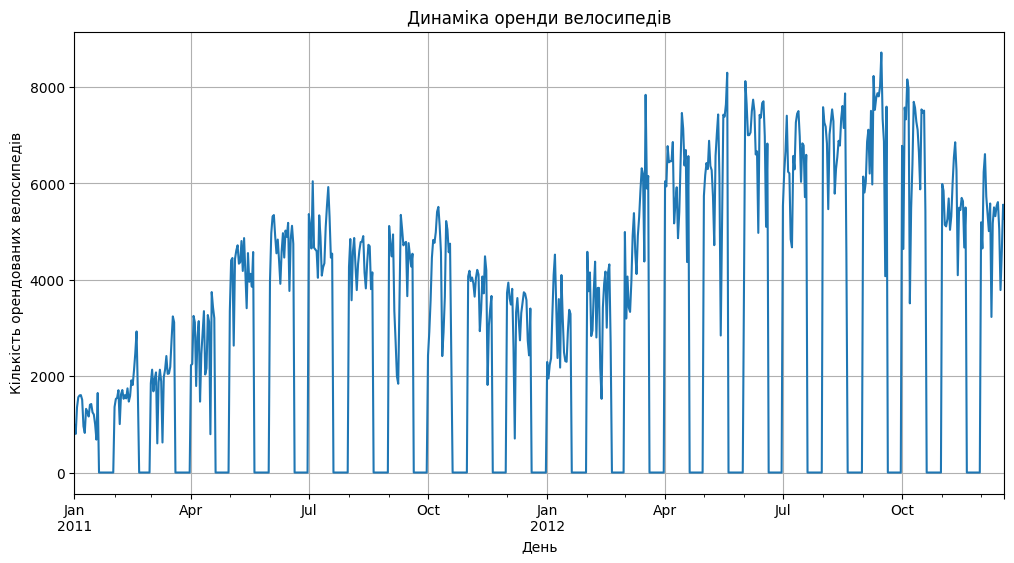

In [30]:
daily_rent.plot(
    kind='line',
    figsize=(12, 6),
    title='Динаміка оренди велосипедів',
    xlabel='День',
    ylabel='Кількість орендованих велосипедів',
    grid=True 
);

In [42]:
days_per_month = df.groupby(['year', 'month'])['day'].nunique()
print(days_per_month)

year  month
2011  1        19
      2        19
      3        19
      4        19
      5        19
      6        19
      7        19
      8        19
      9        19
      10       19
      11       19
      12       19
2012  1        19
      2        19
      3        19
      4        19
      5        19
      6        19
      7        19
      8        19
      9        19
      10       19
      11       19
      12       19
Name: day, dtype: int64


**Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?**

Заломи спостерігаються регулярно, кожного місяця. В ході додаткової операції з даними виявилось, що датасет містить інформацю за неповний клендарний місяць, тобто лише за перші 19 днів. Заломи можна спробувати прибрати шляхом неврахування чисел 20-31 у розрахунках, тобто сумувати продажі з 1 по 19 числа кожного місяця.

**Які загальні тенденції ви бачите на графіку?**

Оренда велосипедів це справа сезонна, і дуже залежить від погодних умов. На графіку ми спостерігаємо що пік оренди припадає на літній період, і відповідно в зимовий час попит спадає. Кількість орендованих велосипедів помітно зросла в 2012 році порівнянно з попереднім роком. Це свідчить про те що сервіс стає популярнішим.

**Чи помітні якісь сезонні коливання?**

Пік оренди припадає на літо та початок осені. Взимку спостерігається значне падіння кількості оренд адже погодні умови стають менш комфортними. 

**Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?**

Є різкі короткочасні падіння які могли бути спричиненими дуже поганою погодою (сильні зливи, шторм). Також спостерігаються різкі підвищення значень в 2012 році це можуть бути викиди, або може бути пов'язано з якимись міськими заходами або надзвичайно сприятливими погодними умовами.


## Завдання 2: Аналіз сезонності (Bar Plot)

**Завдання:**
Побудуйте вертикальну стовпчасту діаграму середньої кількості орендованих велосипедів за сезонами(кварталами). Додайте підписи осей і заголовок.

Просунуте доповнення:
1. Позначте квартали не числом, а назвою на візуалізації.
2. Додайте підписи над стовпцями зі значеннями в кожному стовпці.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В який квартал найбільша середня кількість оренди велосипедів?
2. Як ви можете пояснити таку сезонну закономірність?
3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним кварталми?

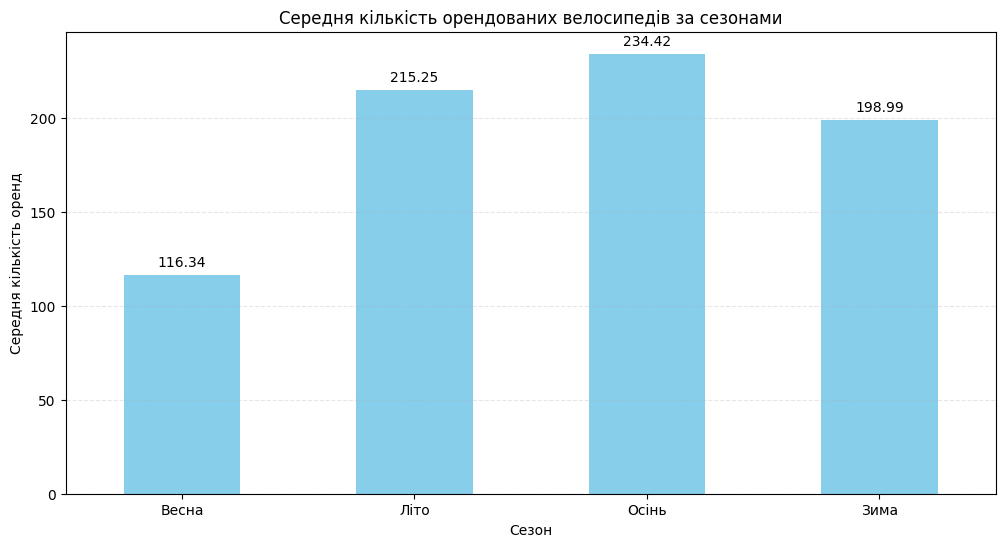

In [58]:
season_names = {1: 'Весна', 2: 'Літо', 3: 'Осінь', 4: 'Зима'}

q_rent = df.groupby('season')['count'].mean()
q_rent.index = q_rent.index.map(season_names)

ax = q_rent.plot.bar(
    figsize=(12, 6), 
    color='skyblue', 
    rot=0,
)
ax.set_title('Середня кількість орендованих велосипедів за сезонами')
ax.set_xlabel('Сезон')
ax.set_ylabel('Середня кількість оренд')
ax.grid(axis='y', linestyle='--', alpha=0.3)

for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', 
        xytext=(0, 9), 
        textcoords='offset points'
    )

plt.show()

**В який квартал найбільша середня кількість оренди велосипедів?**

Найбільша середня кількість оренди спостерігається у 3-му кварталі (Осінь). У даних цей період охоплює найтепліші місяці (липень–вересень).

**Як ви можете пояснити таку сезонну закономірність?**

Це пояснюється сприятливою погодою. У 2-му та 3-му кварталах погода найсприятливіша і підходить для їзди на велосипеді. Натомість у 1-му кварталі (Зима/рання Весна) холодно, що різко знижує попит.

**У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним кварталми?**


In [59]:
diff = q_rent.max() / q_rent.min()
print(f"Різниця складає {diff:.2f} рази")

Різниця складає 2.01 рази


## Завдання 3: Динаміка за місяцями (Line Plot)

**Завдання:**
Створіть лінійний графік середньої кількості оренди велосипедів по місяцях (тобто групування в рамках місяця і беремо середню кількість оренд в цей місяць з кількох років). Використайте маркери-кружечки для точок, додайте сітку та пофарбуйте лінію у червоний колір.

Просунуте доповнення:
- додайте аби по осі ОХ поділки були чітко на кожен окремий місяць по одній. Тобто сумарно 12 поділок.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які місяці спостерігається пік та спад оренди?
2. Чи збігається ця закономірність з результатами з попереднього завдання?
3. Як може вплинути клімат на оренду велосипедів протягом року?


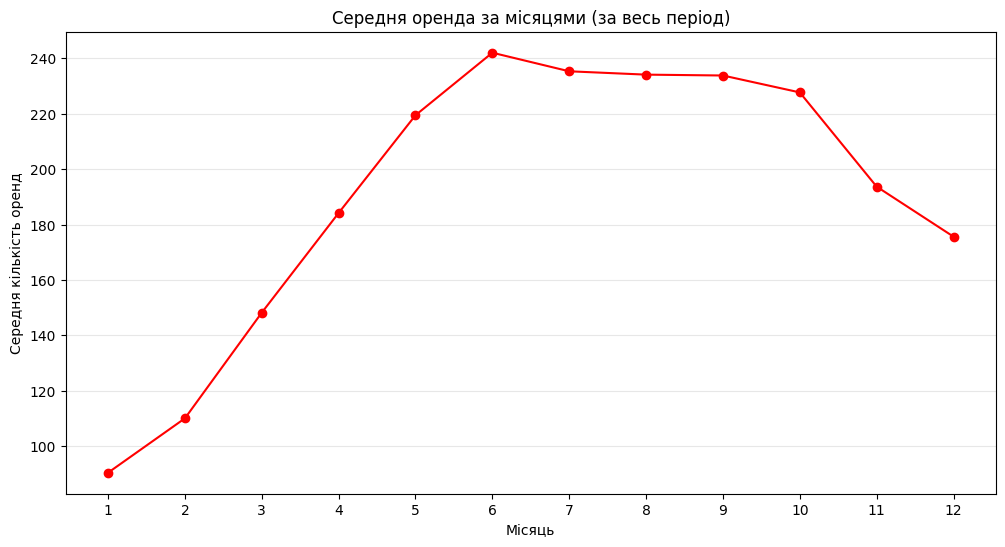

In [62]:
monthly_avg = df.groupby('month')['count'].mean()

ax = monthly_avg.plot(
    kind='line',
    color='red',
    marker='o',
    figsize=(12, 6),
    title='Середня оренда за місяцями (за весь період)',
    xlabel='Місяць',
    ylabel='Середня кількість оренд',
)
plt.xticks(range(1, 13))
ax.grid(axis='y', alpha=0.3)

plt.show()

**В які місяці спостерігається пік та спад оренди?**
Пік зазвичай припадає на червень-вересень (6–9 місяці), спад спостерігається у січні та лютому (1–2 місяці).

**Чи збігається ця закономірність з результатами з попереднього завдання?**

Так, вона повністю підтверджує сезонний графік. Якщо раніше ми бачили, що 3-й квартал (літо-осінь) найпопулярніший, то зараз ми бачимо конкретні місяці цього кварталу, які формують цей пік.

**Як може вплинути клімат на оренду велосипедів протягом року?**

Клімат є визначальним фактором. Температура має пряму кореляцію з орендою: чим тепліше, тим більше людей обирають велосипед. Опади різко знижують кількість оренд через дискомфорт та небезпеку на дорогах.

## Завдання 4: Розподіл погодних умов (Pie Chart)

**Завдання:**
1. Побудуйте кругову діаграму з часткою записів за погодними умовами
2. Додайте підписи з відсотками та легенду з описами погоди (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ).
3. Визначте свої відмінні від стандартних кольори для відображення кожної категорії.
4. Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. Яка погода переважає в датасеті?
2. Чи є дні із сильним дощем? Яка їх частка?
3. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?

Очікуваний результат:

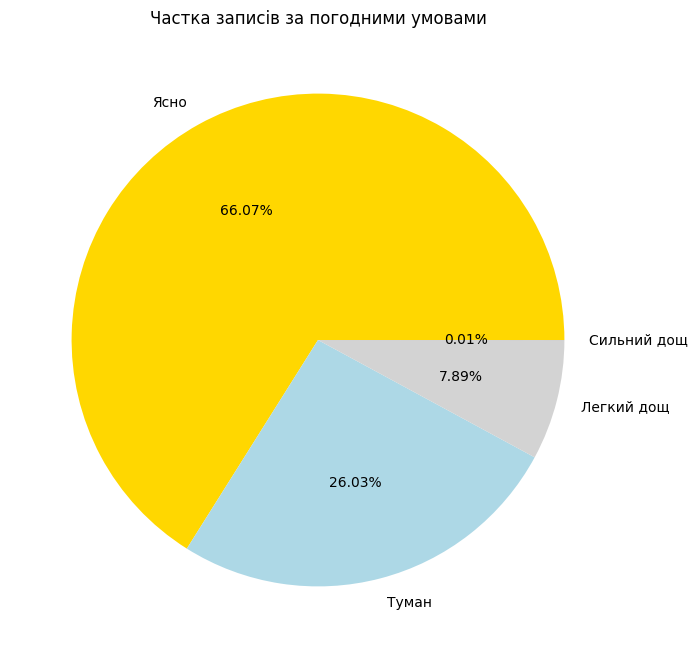

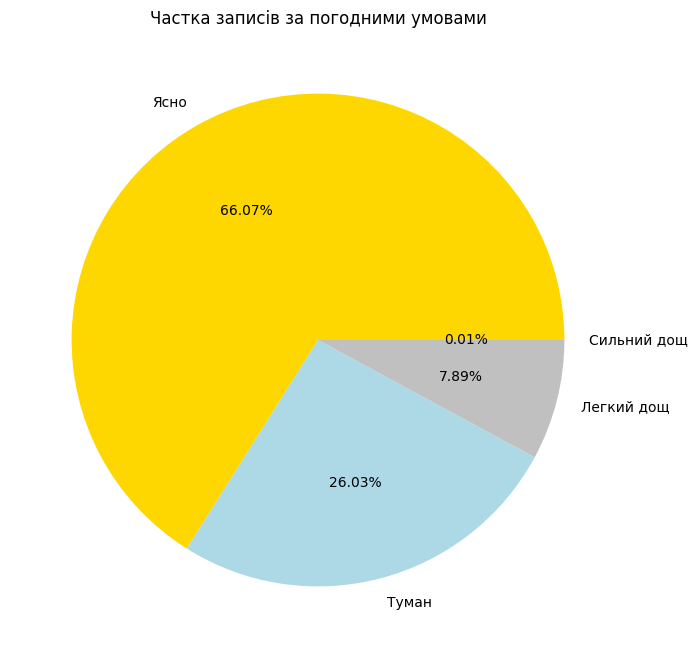

In [74]:
weather_data = df['weather'].value_counts()
weather_type = {1: 'Ясно', 2: 'Туман', 3: 'Легкий дощ', 4: 'Сильний дощ'}
weather_data.index = weather_data.index.map(weather_type)

weather_data.plot.pie(
    figsize=(8, 8),
    autopct='%1.2f%%',
    title='Частка записів за погодними умовами',
    ylabel='',
    colors=['gold', 'lightblue', 'silver', 'grey'],
)

plt.show()

**Яка погода переважає в датасеті?**

Переважає ясна погода (66.07%). Це понад дві третини всіх записів у датасеті.

**Чи є дні із сильним дощем? Яка їх частка?**

Так, такі дні є, але їх вкрай мало. Частка складає всього 0.01%. Це означає, що за весь період спостережень сильна негода траплялася дуже мало.

**Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?**

Погода має критичний вплив. Оскільки 66% записів припадає на ясну погоду, можна зробити висновок, що сервіс працює найактивніше саме в комфортних умовах. При переході від "Ясно" до "Туман" або "Дощ" попит буде стрімко падати, оскільки їзда стає некомфортною та небезпечною. Сильний дощ (0.01%) практично паралізує оренду.

## Завдання 5: Box Plot для аналізу викидів

**Завдання:**
Створіть коробковий графік (box plot) кількості орендованих велосипедів для кожного типу погоди.

Просунуте доповнення:
- Використайте горизонтальну орієнтацію.
- Позначте погодні умови не числом, а назвою на візуалізації.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. При якій погоді найбільший розкид у кількості оренди?
2. Чи є викиди (outliers) в даних? При якій погоді?
3. При якій погоді медіанне значення оренди найвище?

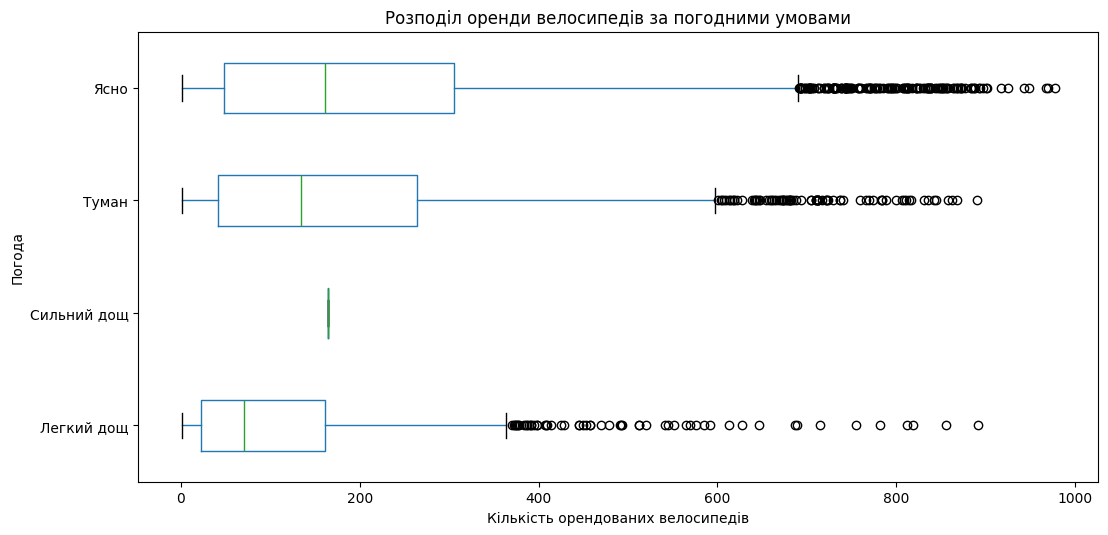

In [77]:
weather_type = {1: 'Ясно', 2: 'Туман', 3: 'Легкий дощ', 4: 'Сильний дощ'}

df_plot = df.copy()
df_plot['weather_name'] = df_plot['weather'].map(weather_type)

ax_box = df_plot.boxplot(
    column='count', 
    by='weather_name', 
    vert=False,
    figsize=(12, 6),
    grid=False
)

plt.title('Розподіл оренди велосипедів за погодними умовами')
plt.suptitle('')
plt.xlabel('Кількість орендованих велосипедів')
plt.ylabel('Погода')

plt.show()

**При якій погоді найбільший розкид у кількості оренди?**

Найбільший розкид спостерігається при погоді "Ясно". 

**Чи є викиди (outliers) в даних? При якій погоді?**

Так, викиди присутні майже при всіх типах погоди. Найбільше викидів спостерігається при погоді "Ясно" та "Туман". 

**При якій погоді медіанне значення оренди найвище?**

Медіанне значення найвище при погоді "Ясно". Це підтверджує, що в сонячні дні типова кількість оренд є максимальною порівняно з іншими погодними умовами.

## Завдання 6: Кореляція температури та оренди (Scatter Plot)

**Завдання:**
Побудуйте діаграму розсіювання залежності між температурою (`temp`) та загальною кількістю оренди (`count`). Розфарбуйте точки за сезонами, додайте напівпрозорість (alpha=0.6).

**Увага!** За замовченням буде колір

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
- Чи є зв'язок між температурою та кількістю оренди? Який?

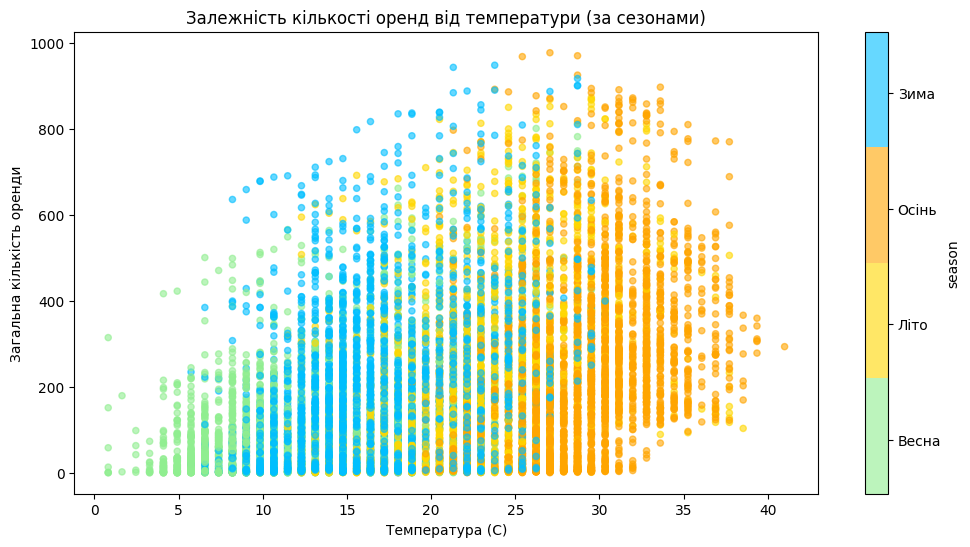

In [85]:
from matplotlib.colors import ListedColormap

my_colors = ['lightgreen', 'gold', 'orange', 'deepskyblue']
my_cmap = ListedColormap(my_colors)

ax_scatter = df.plot.scatter(
    x='temp', 
    y='count', 
    c='season', 
    cmap=my_cmap, 
    alpha=0.6, 
    figsize=(12, 6),
    sharex=False
)

plt.title('Залежність кількості оренд від температури (за сезонами)')
plt.xlabel('Температура (C)')
plt.ylabel('Загальна кількість оренди')

cbar = ax_scatter.collections[0].colorbar
cbar.set_ticks([1.35, 2.1, 2.85, 3.6])
cbar.set_ticklabels(['Весна', 'Літо', 'Осінь', 'Зима'])

plt.show()

**Чи є зв'язок між температурою та кількістю оренди? Який?**

Так, на графіку видно позитивний лінійний зв'язок (кореляцію) між цими показниками. Зі збільшенням температури кількість орендованих велосипедів також зростає. Найвищі значення оренди зосереджені в діапазоні температур від 25°C до 35°C.
Температура є одним із ключових факторів впливу на попит. Люди набагато частіше користуються сервісом у теплу погоду, ніж у холодну.

## (Опціонально) Завдання 7: Порівняння користувачів (Stacked Bar Chart)

**Завдання:**
Ми хочемо дізнатись як по дням тижня беруть в середньому в оренду велосипеди випадкові і зареєстровані користувачі.

Створіть стовпчасту діаграму з накопиченням (bar з налаштуванням `stacked=True`), яка показує співвідношення випадкових (`casual`) та зареєстрованих (`registered`) користувачів по днях тижня за кількістю взятих ними велосипедів в оренду в середньому. Використайте різні кольори для типів користувачів.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які дні тижня більше оренд від зареєстрованих користувачів?
2. Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?

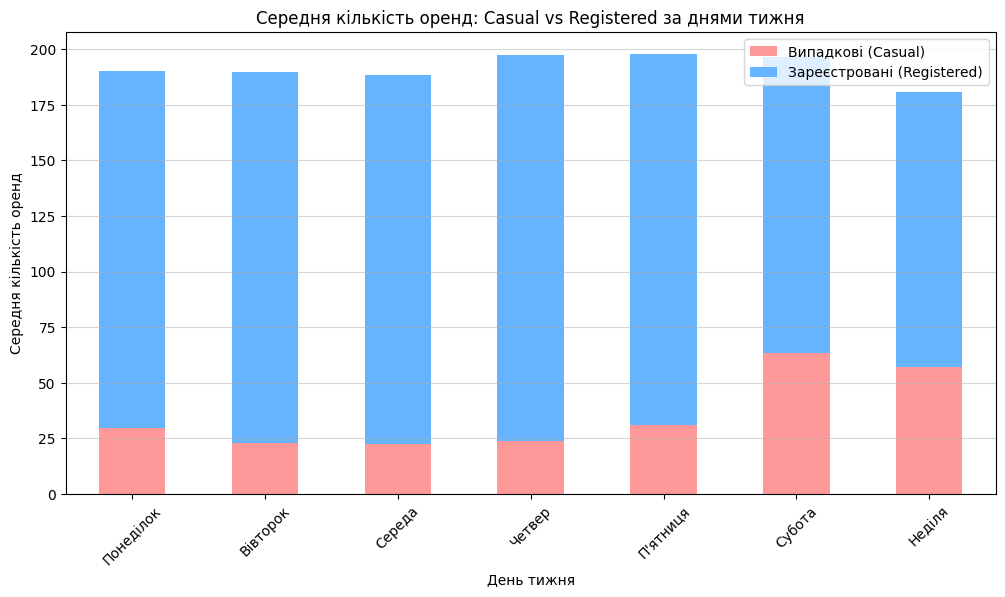

In [92]:
day_names = {0: 'Понеділок', 1: 'Вівторок', 2: 'Середа', 3: 'Четвер', 4: "П'ятниця", 5: 'Субота', 6: 'Неділя'}
user_stats = df.groupby('weekday_num')[['casual', 'registered']].mean()
user_stats.index = user_stats.index.map(day_names)

ax_bars = user_stats.plot(
    kind='bar', 
    stacked=True,
    figsize=(12, 6),
    color=['#ff9999', '#66b3ff'],
    rot=45
)

# 4. Налаштування
plt.title('Середня кількість оренд: Casual vs Registered за днями тижня')
plt.xlabel('День тижня')
plt.ylabel('Середня кількість оренд')
plt.legend(['Випадкові (Casual)', 'Зареєстровані (Registered)'])
plt.grid(axis='y', alpha=0.5)

plt.show()

**В які дні тижня більше оренд від зареєстрованих користувачів?**

Найбільша кількість оренд від зареєстрованих користувачів спостерігається у будні дні (з понеділка по п'ятницю).

**Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?**

Зареєстровані користувачі (Registered) це переважно місцеві жителі, які використовують велосипеди як транспорт для поїздок на роботу чи навчання. Тому їхня активність стабільна і висока саме в робочі дні.

Випадкові користувачі (Casual) це туристи або люди, що катаються для відпочинку. Їхня частка різко зростає у суботу та неділю, оскільки це час для прогулянок та дозвілля.

